# Data Collection and Initial Exploration

This notebook handles the initial data loading and exploration of the German Credit Dataset. We'll examine the dataset structure, identify data quality issues, and understand the distribution of key variables.

## Objectives:
- Load the German Credit dataset
- Perform initial data quality assessment
- Analyze feature distributions
- Examine target variable balance
- Identify potential data preprocessing needs

---

## 1. Setup and Configuration

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from test_case_fairmoney.utils.constants import PATH_DATA_RAW, PATH_DATA_COMPRESSED

# Configure pandas display options for better data exploration
pd.set_option("display.max_rows", 300)
pd.set_option("display.max_columns", 800)
pd.set_option("display.float_format", "{:.2f}".format)

# Set plotting style
plt.style.use("default")
sns.set_palette("husl")

print("✅ Libraries imported successfully")
print(f"📂 Data path: {PATH_DATA_RAW}")

✅ Libraries imported successfully
📂 Data path: /Users/phamkythoai/Desktop/Data_Science/test_case_fairmoney/project_data/data/raw


## 2. Data Loading

Load the German Credit dataset and perform initial inspection.

In [17]:
# Load the German Credit dataset
print("📊 Loading German Credit Dataset...")
df = pd.read_csv(PATH_DATA_RAW / "credit.csv").drop(columns=["Unnamed: 0"])

print(f"✅ Dataset loaded successfully!")
print(f"   Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"   Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

📊 Loading German Credit Dataset...
✅ Dataset loaded successfully!
   Shape: 1,000 rows × 22 columns
   Memory usage: 0.80 MB


## 3. Initial Data Inspection

### 3.1 Sample Data Preview

Display the first few rows to understand the dataset structure.

In [18]:
print("📋 First 5 rows of the dataset:")
display(df.head())

print("\n📋 Last 5 rows of the dataset:")
display(df.tail())

📋 First 5 rows of the dataset:


checking_balance  months_loan_duration credit_history    purpose  amount  \
0            -43.00                     6       critical   radio/tv    1169   
1             75.00                    48         repaid   radio/tv    5951   
2               NaN                    12       critical  education    2096   
3            -32.00                    42         repaid  furniture    7882   
4            -23.00                    24        delayed  car (new)    4870   

   savings_balance employment_length  installment_rate personal_status  \
0              NaN          13 years                 4          single   
1            89.00           2 years                 2             NaN   
2            24.00           5 years                 2          single   
3             9.00           5 years                 2          single   
4            43.00           3 years                 3          single   

  other_debtors residence_history                  property  age  \
0          none           6 years               real estate   67   
1          none          5 months               real estate   22   
2          none           4 years               real estate   49   
3     guarantor          13 years  building society savings   45   
4          none          13 years              unknown/none   53   

  installment_plan   housing  existing_credits  default  dependents  \
0             none       own                 2        0           1   
1             none       own                 1        1           1   
2             none       own                 1        0           2   
3             none  for free                 1        0           2   
4             none  for free                 2        1           2   

      telephone foreign_worker                 job  gender  
0 2349339647.00            yes    skilled employee    male  
1           NaN            yes    skilled employee  female  
2           NaN            yes  unskilled resident    male  
3           NaN            yes    skilled employee    male  
4           NaN            yes    skilled employee    male


📋 Last 5 rows of the dataset:


checking_balance  months_loan_duration credit_history     purpose  \
995               NaN                    12         repaid   furniture   
996            -30.00                    30         repaid  car (used)   
997               NaN                    12         repaid    radio/tv   
998            -18.00                    45         repaid    radio/tv   
999            194.00                    45       critical  car (used)   

     amount  savings_balance employment_length  installment_rate  \
995    1736            48.00           4 years                 3   
996    3857            20.00           3 years                 4   
997     804            44.00          13 years                 4   
998    1845            31.00           2 years                 4   
999    4576           128.00               NaN                 3   

    personal_status other_debtors residence_history                  property  \
995             NaN          none          20 years               real estate   
996        divorced          none           5 years  building society savings   
997          single          none          16 years                     other   
998          single          none           8 years              unknown/none   
999          single          none          21 years                     other   

     age installment_plan   housing  existing_credits  default  dependents  \
995   31             none       own                 1        0           1   
996   40             none       own                 1        0           1   
997   38             none       own                 1        0           1   
998   23             none  for free                 1        1           1   
999   27             none       own                 1        0           1   

        telephone foreign_worker                      job  gender  
995           NaN            yes       unskilled resident  female  
996 2340003563.00            yes  mangement self-employed    male  
997           NaN            yes         skilled employee    male  
998 2342257370.00            yes         skilled employee    male  
999           NaN            yes         skilled employee    male

### 3.2 Dataset Dimensions

In [19]:
print("📐 Dataset Dimensions:")
print(f"   Rows (observations): {df.shape[0]:,}")
print(f"   Columns (features): {df.shape[1]}")
print(f"   Total data points: {df.shape[0] * df.shape[1]:,}")

📐 Dataset Dimensions:
   Rows (observations): 1,000
   Columns (features): 22
   Total data points: 22,000


### 3.3 Statistical Summary

Generate descriptive statistics for numerical features.

In [20]:
print("📊 Statistical Summary of Numerical Features:")
display(df.describe())

📊 Statistical Summary of Numerical Features:


checking_balance  months_loan_duration   amount  savings_balance  \
count            606.00               1000.00  1000.00           817.00   
mean              97.25                 20.90  3271.26           781.57   
std              206.92                 12.06  2822.74          3016.98   
min              -50.00                  4.00   250.00             0.00   
25%              -23.00                 12.00  1365.50            31.00   
50%               24.00                 18.00  2319.50            64.00   
75%              131.75                 24.00  3972.25           128.00   
max              999.00                 72.00 18424.00         19972.00   

       installment_rate     age  existing_credits  default  dependents  \
count           1000.00 1000.00           1000.00  1000.00     1000.00   
mean               2.97   35.55              1.41     0.30        1.16   
std                1.12   11.38              0.58     0.46        0.36   
min                1.00   19.00              1.00     0.00        1.00   
25%                2.00   27.00              1.00     0.00        1.00   
50%                3.00   33.00              1.00     0.00        1.00   
75%                4.00   42.00              2.00     1.00        1.00   
max                4.00   75.00              4.00     1.00        2.00   

          telephone  
count        404.00  
mean  2344914322.69  
std      3008192.91  
min   2340000335.00  
25%   2342211185.00  
50%   2344804428.50  
75%   2347730994.25  
max   2349994320.00

## 4. Data Quality Assessment

### 4.1 Data Types and Structure

In [21]:
print("🔍 Data Type Analysis:")
print("=" * 60)

# Display data types
dtype_df = pd.DataFrame(
    {
        "Column": df.columns,
        "Data Type": df.dtypes.values,
        "Non-Null Count": df.count().values,
        "Null Count": df.isnull().sum().values,
        "Null %": (df.isnull().sum() / len(df) * 100).values,
    }
)

display(dtype_df)

print(f"\n📊 Data Type Summary:")
print(df.dtypes.value_counts())

# Check for missing values
total_missing = df.isnull().sum().sum()
if total_missing == 0:
    print(f"\n✅ No missing values detected!")
else:
    print(f"\n⚠️  Total missing values: {total_missing}")

🔍 Data Type Analysis:


Column Data Type  Non-Null Count  Null Count  Null %
0       checking_balance   float64             606         394   39.40
1   months_loan_duration     int64            1000           0    0.00
2         credit_history    object            1000           0    0.00
3                purpose    object            1000           0    0.00
4                 amount     int64            1000           0    0.00
5        savings_balance   float64             817         183   18.30
6      employment_length    object             938          62    6.20
7       installment_rate     int64            1000           0    0.00
8        personal_status    object             690         310   31.00
9          other_debtors    object            1000           0    0.00
10     residence_history    object             870         130   13.00
11              property    object            1000           0    0.00
12                   age     int64            1000           0    0.00
13      installment_plan    object            1000           0    0.00
14               housing    object            1000           0    0.00
15      existing_credits     int64            1000           0    0.00
16               default     int64            1000           0    0.00
17            dependents     int64            1000           0    0.00
18             telephone   float64             404         596   59.60
19        foreign_worker    object            1000           0    0.00
20                   job    object            1000           0    0.00
21                gender    object            1000           0    0.00


📊 Data Type Summary:
object     12
int64       7
float64     3
Name: count, dtype: int64

⚠️  Total missing values: 1675


### 4.2 Feature Cardinality Analysis

Examine unique value counts to understand feature characteristics.

In [22]:
print("🔢 Unique Value Counts per Feature:")
print("=" * 60)

unique_counts = df.nunique().sort_values()
unique_df = pd.DataFrame(
    {
        "Feature": unique_counts.index,
        "Unique Values": unique_counts.values,
        "Cardinality": unique_counts.values / len(df) * 100,
    }
)

display(unique_df.style.format({"Cardinality": "{:.2f}%"}))

print("\n📝 Feature Type Classification:")
categorical_features = unique_counts[unique_counts < 20].index.tolist()
numerical_features = unique_counts[unique_counts >= 20].index.tolist()

# Remove target from lists if present
if "default" in categorical_features:
    categorical_features.remove("default")
if "default" in numerical_features:
    numerical_features.remove("default")

print(f"   Categorical features ({len(categorical_features)}): {categorical_features}")
print(f"   Numerical features ({len(numerical_features)}): {numerical_features}")
print(f"   Target variable: default")

🔢 Unique Value Counts per Feature:



📝 Feature Type Classification:
   Categorical features (13): ['gender', 'foreign_worker', 'dependents', 'personal_status', 'other_debtors', 'installment_plan', 'housing', 'installment_rate', 'job', 'property', 'existing_credits', 'credit_history', 'purpose']
   Numerical features (8): ['employment_length', 'months_loan_duration', 'residence_history', 'age', 'checking_balance', 'savings_balance', 'telephone', 'amount']
   Target variable: default


## 6. Target Variable Analysis

### Understanding Class Distribution

Analyzing the target variable 'default' to understand class balance and potential modeling challenges.

🎯 Target Variable Analysis:
Total samples: 1,000

Class Distribution:
   No Default (0): 700 samples (70.00%)
   Default (1): 300 samples (30.00%)

Class Imbalance Ratio: 2.33:1
✅ Class distribution is reasonably balanced


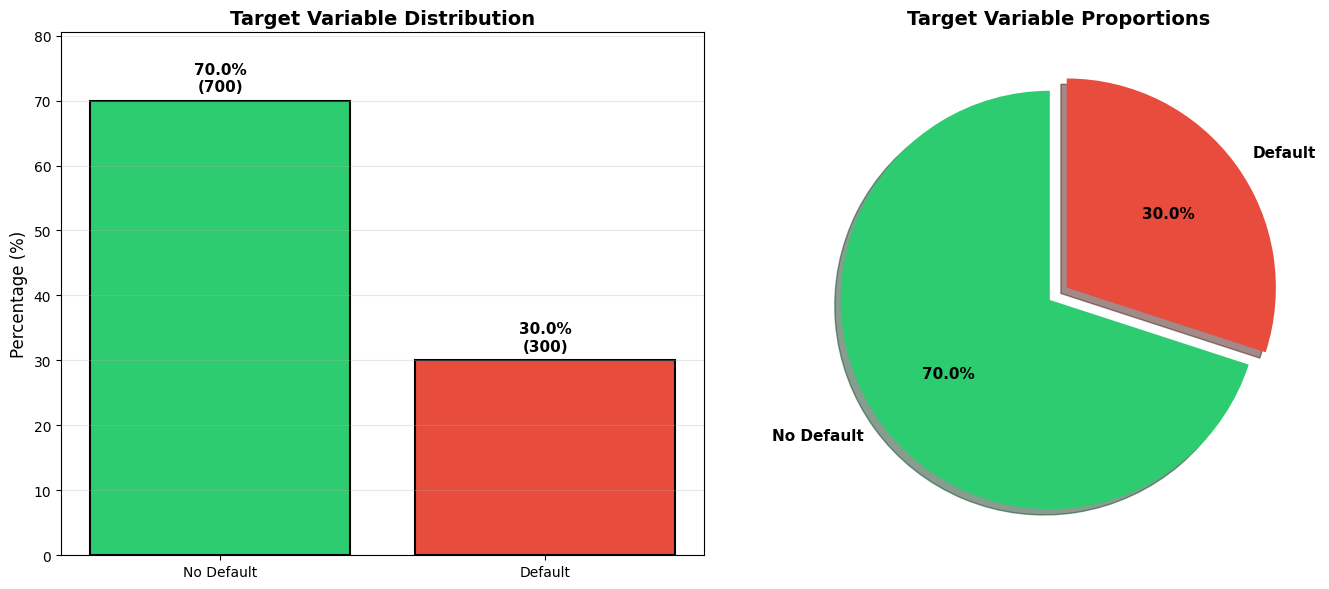

In [23]:
# Analyze target variable distribution
print("🎯 Target Variable Analysis:")
print("=" * 60)

# Calculate statistics
target_counts = df["default"].value_counts()
target_percentages = df["default"].value_counts(normalize=True) * 100
imbalance_ratio = target_counts[0] / target_counts[1]

print(f"Total samples: {len(df):,}")
print(f"\nClass Distribution:")
print(f"   No Default (0): {target_counts[0]:,} samples ({target_percentages[0]:.2f}%)")
print(f"   Default (1): {target_counts[1]:,} samples ({target_percentages[1]:.2f}%)")
print(f"\nClass Imbalance Ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 5:
    print("⚠️  Moderate class imbalance detected - consider resampling techniques")
elif imbalance_ratio > 10:
    print("⚠️  Significant class imbalance detected - resampling highly recommended")
else:
    print("✅ Class distribution is reasonably balanced")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot
bars = ax1.bar(
    ["No Default", "Default"],
    target_percentages.values,
    color=["#2ecc71", "#e74c3c"],
    edgecolor="black",
    linewidth=1.5,
)

# Add percentage labels
for bar, pct, count in zip(bars, target_percentages.values, target_counts.values):
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f"{pct:.1f}%\n({count:,})",
        ha="center",
        va="bottom",
        fontweight="bold",
        fontsize=11,
    )

ax1.set_title("Target Variable Distribution", fontsize=14, fontweight="bold")
ax1.set_ylabel("Percentage (%)", fontsize=12)
ax1.set_ylim(0, max(target_percentages.values) * 1.15)
ax1.grid(axis="y", alpha=0.3)

# Pie chart
colors = ["#2ecc71", "#e74c3c"]
explode = (0.05, 0.05)
ax2.pie(
    target_counts.values,
    labels=["No Default", "Default"],
    autopct="%1.1f%%",
    colors=colors,
    explode=explode,
    startangle=90,
    textprops={"fontsize": 11, "fontweight": "bold"},
    shadow=True,
)
ax2.set_title("Target Variable Proportions", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

## 7. Modeling Considerations for Imbalanced Data

### Why Standard Accuracy Is Misleading

With a **~70/30 class split**, a naive model that always predicts "No Default" would achieve **70% accuracy** but provide zero business value. This demonstrates why accuracy alone is insufficient for imbalanced classification problems.

---

## 📊 Appropriate Metrics for Imbalanced Classification

### 1. **Precision** 
**Formula**: TP / (TP + FP)

**What it measures**: Of all predicted defaults, how many were actually defaults?

**Business interpretation**: "When we reject a loan application, how often are we correct?"

**Why useful**: Helps minimize false alarms (rejecting good customers)

---

### 2. **Recall (Sensitivity)**
**Formula**: TP / (TP + FN)

**What it measures**: Of all actual defaults, how many did we correctly identify?

**Business interpretation**: "Of all risky loans, how many did we successfully catch?"

**Why useful**: Critical for catching the minority class (defaults) and preventing losses

---

### 3. **F1-Score**
**Formula**: 2 × (Precision × Recall) / (Precision + Recall)

**What it measures**: Harmonic mean balancing precision and recall

**Why useful**: Provides single metric that doesn't favor majority class like accuracy does

---

### 4. **ROC-AUC (Receiver Operating Characteristic - Area Under Curve)**
**What it measures**: Model's ability to distinguish between classes across all thresholds

**Range**: 0.5 (random) to 1.0 (perfect)

**Why useful**: Threshold-independent performance measure

**Limitation**: Can be overly optimistic with highly imbalanced data

---

### 5. **PR-AUC (Precision-Recall Area Under Curve)** ⭐ **Best for Imbalanced Data**
**What it measures**: Trade-off between precision and recall across thresholds

**Why especially useful**: 
- Focuses on minority class performance
- Not inflated by large number of true negatives
- More informative than ROC-AUC for imbalanced datasets
- Better reflects real-world model utility

---

## 🎯 Recommended Approach

For this credit risk problem:

1. **Primary Metric**: PR-AUC and ROC-AUC (best for imbalanced scenarios)
2. **Secondary Metrics**: 
   - F1-Score (balance precision/recall)
   - Recall (ensure we catch defaults)
   - Business-specific cost function (financial impact)

3. **Avoid**: Using accuracy as the sole metric

4. **Consider**: 
   - Class weighting in model training
   - Threshold optimization for business objectives
   - Cost-sensitive learning (different costs for FP vs FN)
